# Art Automated 

- run all cells to create a static and an animated drawing!

In [1]:
# install these packages first
# !pip install rpy2 wordcloud

In [2]:
%load_ext rpy2.ipython

C:\Users\lonesome\anaconda3\envs\rpy_env\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [ ]:
%%R
# R kernel to run scholar package
# install.packages("scholar")
# install.packages("XML")
# install.packages("tm")

library(scholar)

id_list = list("OcKWjEwAAAAJ", "zjJ4V0UAAAAJ", "ony4DjAAAAAJ",
               "Xju48KQAAAAJ", "WjHjbrwAAAAJ", 'dIcpfzAAAAAJ', 
               'eM916YMAAAAJ', "K1fBLjwAAAAJ", 'AzMzY5AAAAAJ')
pubs = list()
for (id in id_list){
    pubs <- rbind(pubs, get_publications(id))
}

write.csv(pubs, './pubs.csv')

In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
import PIL.ImageOps    
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
import re
import bibtexparser
from bibtexparser.bparser import BibTexParser
from bibtexparser.bibdatabase import as_text

In [5]:
# publications from authors I like
pubs = pd.read_csv('./pubs.csv', encoding = "ISO-8859-1")
pubs = pubs[pubs.cites !=0]
print(pubs.shape)
pubs.head()

(1346, 9)


,Unnamed: 0,title,author,journal,number,cites,year,cid,pubid
0,1,Analyzing neural time series data: theory and ...,MX Cohen,MIT press,NaN,1394,2014.0,16609681170307974223,S16KYo8Pm5AC
1,2,Deep brain stimulation to reward circuitry all...,"TE Schlaepfer, MX Cohen, C Frick, M Kosel, D B...",Neuropsychopharmacology,"33 (2), 368-377",984,2008.0,6312875800803301348,u-x6o8ySG0sC
2,3,"Oxytocin enhances amygdala-dependent, socially...","R Hurlemann, A Patin, OA Onur, MX Cohen, T Bau...",Journal of Neuroscience,"30 (14), 4999-5007",837,2010.0,5535864671580859578,ufrVoPGSRksC
3,4,Dissociable correlates of recollection and fam...,"C Ranganath, AP Yonelinas, MX Cohen, CJ Dy, SM...",Neuropsychologia,"42 (1), 2-13",780,2004.0,15059090490429200186,u5HHmVD_uO8C
4,5,Nucleus accumbens deep brain stimulation decre...,"BH Bewernick, R Hurlemann, A Matusch, S Kayser...",Biological psychiatry,"67 (2), 110-116",747,2010.0,4140879237103503973,9yKSN-GCB0IC


In [6]:
# get citations from my projects
with open('my_bib.txt') as my_bib:
    bibtex_str = my_bib.read()

bib_db = bibtexparser.loads(bibtex_str)
print(bib_db.entries[0]['title'])

my_cites = ' '.join([t['title'] for t in bib_db.entries])

# with open('my_cites.txt', 'w') as my_bib:
#     my_bib.write(text_titles)

# print(my_cites)

In [7]:
sns.color_palette('tab20b', 20)

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

### draw as image

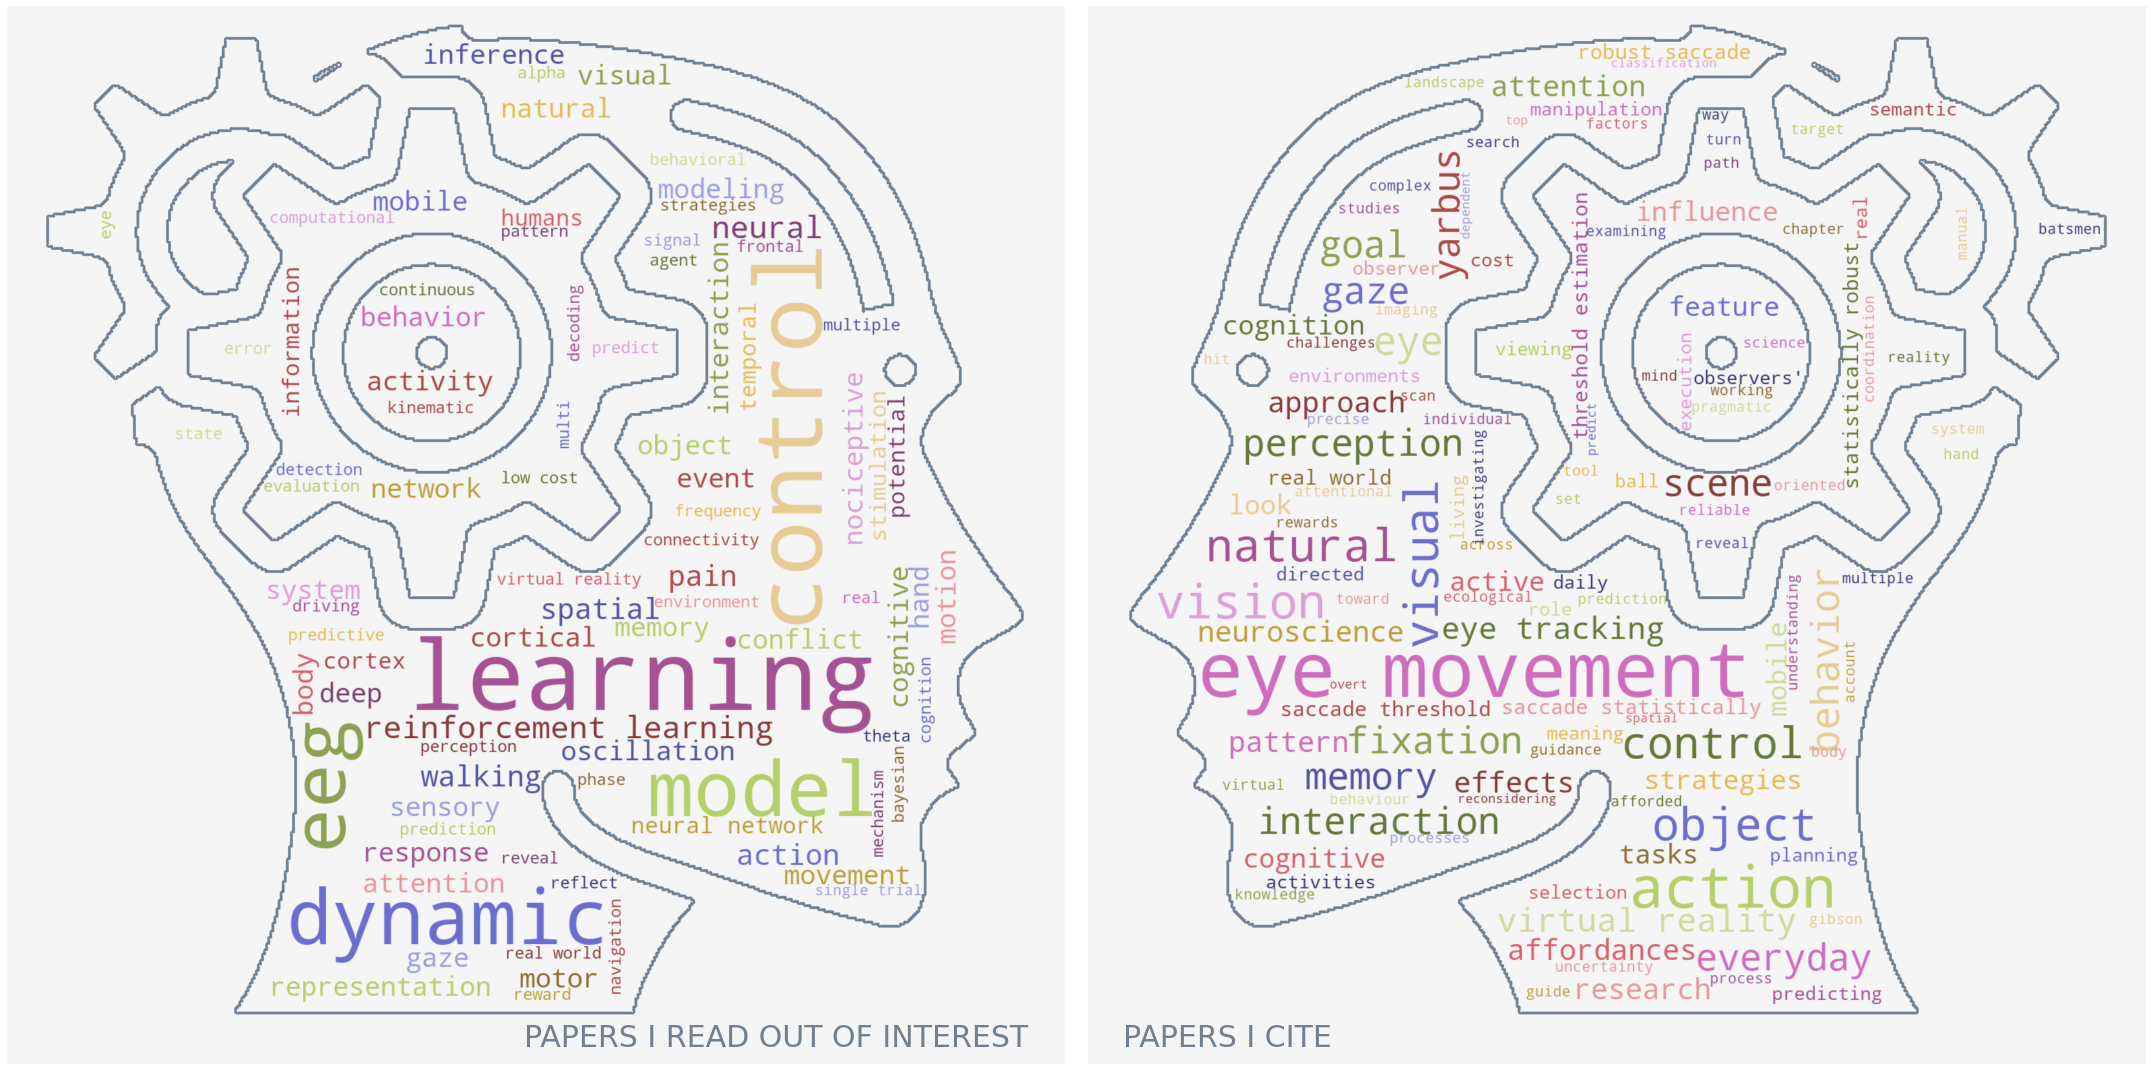

In [8]:
%matplotlib inline
# get predefined stopwords
stopwords = set(STOPWORDS)
# add more stopwords
stopwords.update(
    {
        "image", "images", "using", "der" 
        ,"based", "evidence", "study", "xcs","life"
        ,"und","cat", "leads","modulate","modulates","processing"
        ,"U", "towards", "data", 'robotic', 'mad'
        ,"time","Group","asthma","new","task","von","treatment"
        ,"effect", "de", 'related', 'human', 'brain'
    }
)


# get image to draw on
brain_mask = Image.open("thinking.png")
brain_mask = PIL.ImageOps.invert(brain_mask.convert('RGB'))

# show original brain mask
# plt.imshow(brain_mask)

# get all titles for publications since 1980
text_titles = ' '.join([t for t in pubs.query('year > 2010').title.values])

# initialize artist to draw words over brain mask
wc1 = WordCloud(
    background_color="whitesmoke", max_words=500, 
    min_font_size=6,
    scale=3,
    mask=np.fliplr(np.array(brain_mask)), 
    colormap='tab20b',
    stopwords=stopwords, 
    contour_width=3, 
    contour_color='slategrey',
    prefer_horizontal=0.9,
#     width=2000, height=2000
)

# generate art for the given titles
wc1.generate(text_titles.lower())

wc2 = WordCloud(
    background_color="whitesmoke", max_words=200, 
    min_font_size=6,
    scale=3,
    mask=np.array(brain_mask), 
    colormap='tab20b',
    stopwords=stopwords, 
    contour_width=3, 
    contour_color='slategrey',
    prefer_horizontal=0.9,
#     width=2000, height=2000
)

# generate art for the given titles
wc2.generate(my_cites.lower())


_, ax = plt.subplots(1, 2, figsize=(30,30))
plt.subplots_adjust(wspace=0.001, left=0.01)
ax[0].imshow(wc1, interpolation='bilinear')
ax[0].axis("off")
ax[0].text(750, 1510, 'PAPERS I READ OUT OF INTEREST', fontsize=30, color='slategrey')

ax[1].imshow(wc2, interpolation='bilinear')
ax[1].axis("off")
ax[1].text(50, 1510, 'PAPERS I CITE', fontsize=30, color='slategrey')
# print as jpg 
plt.tight_layout()
plt.savefig('./static_drawing.jpg', transparent=True)


### draw as movie

<IPython.core.display.Javascript object>


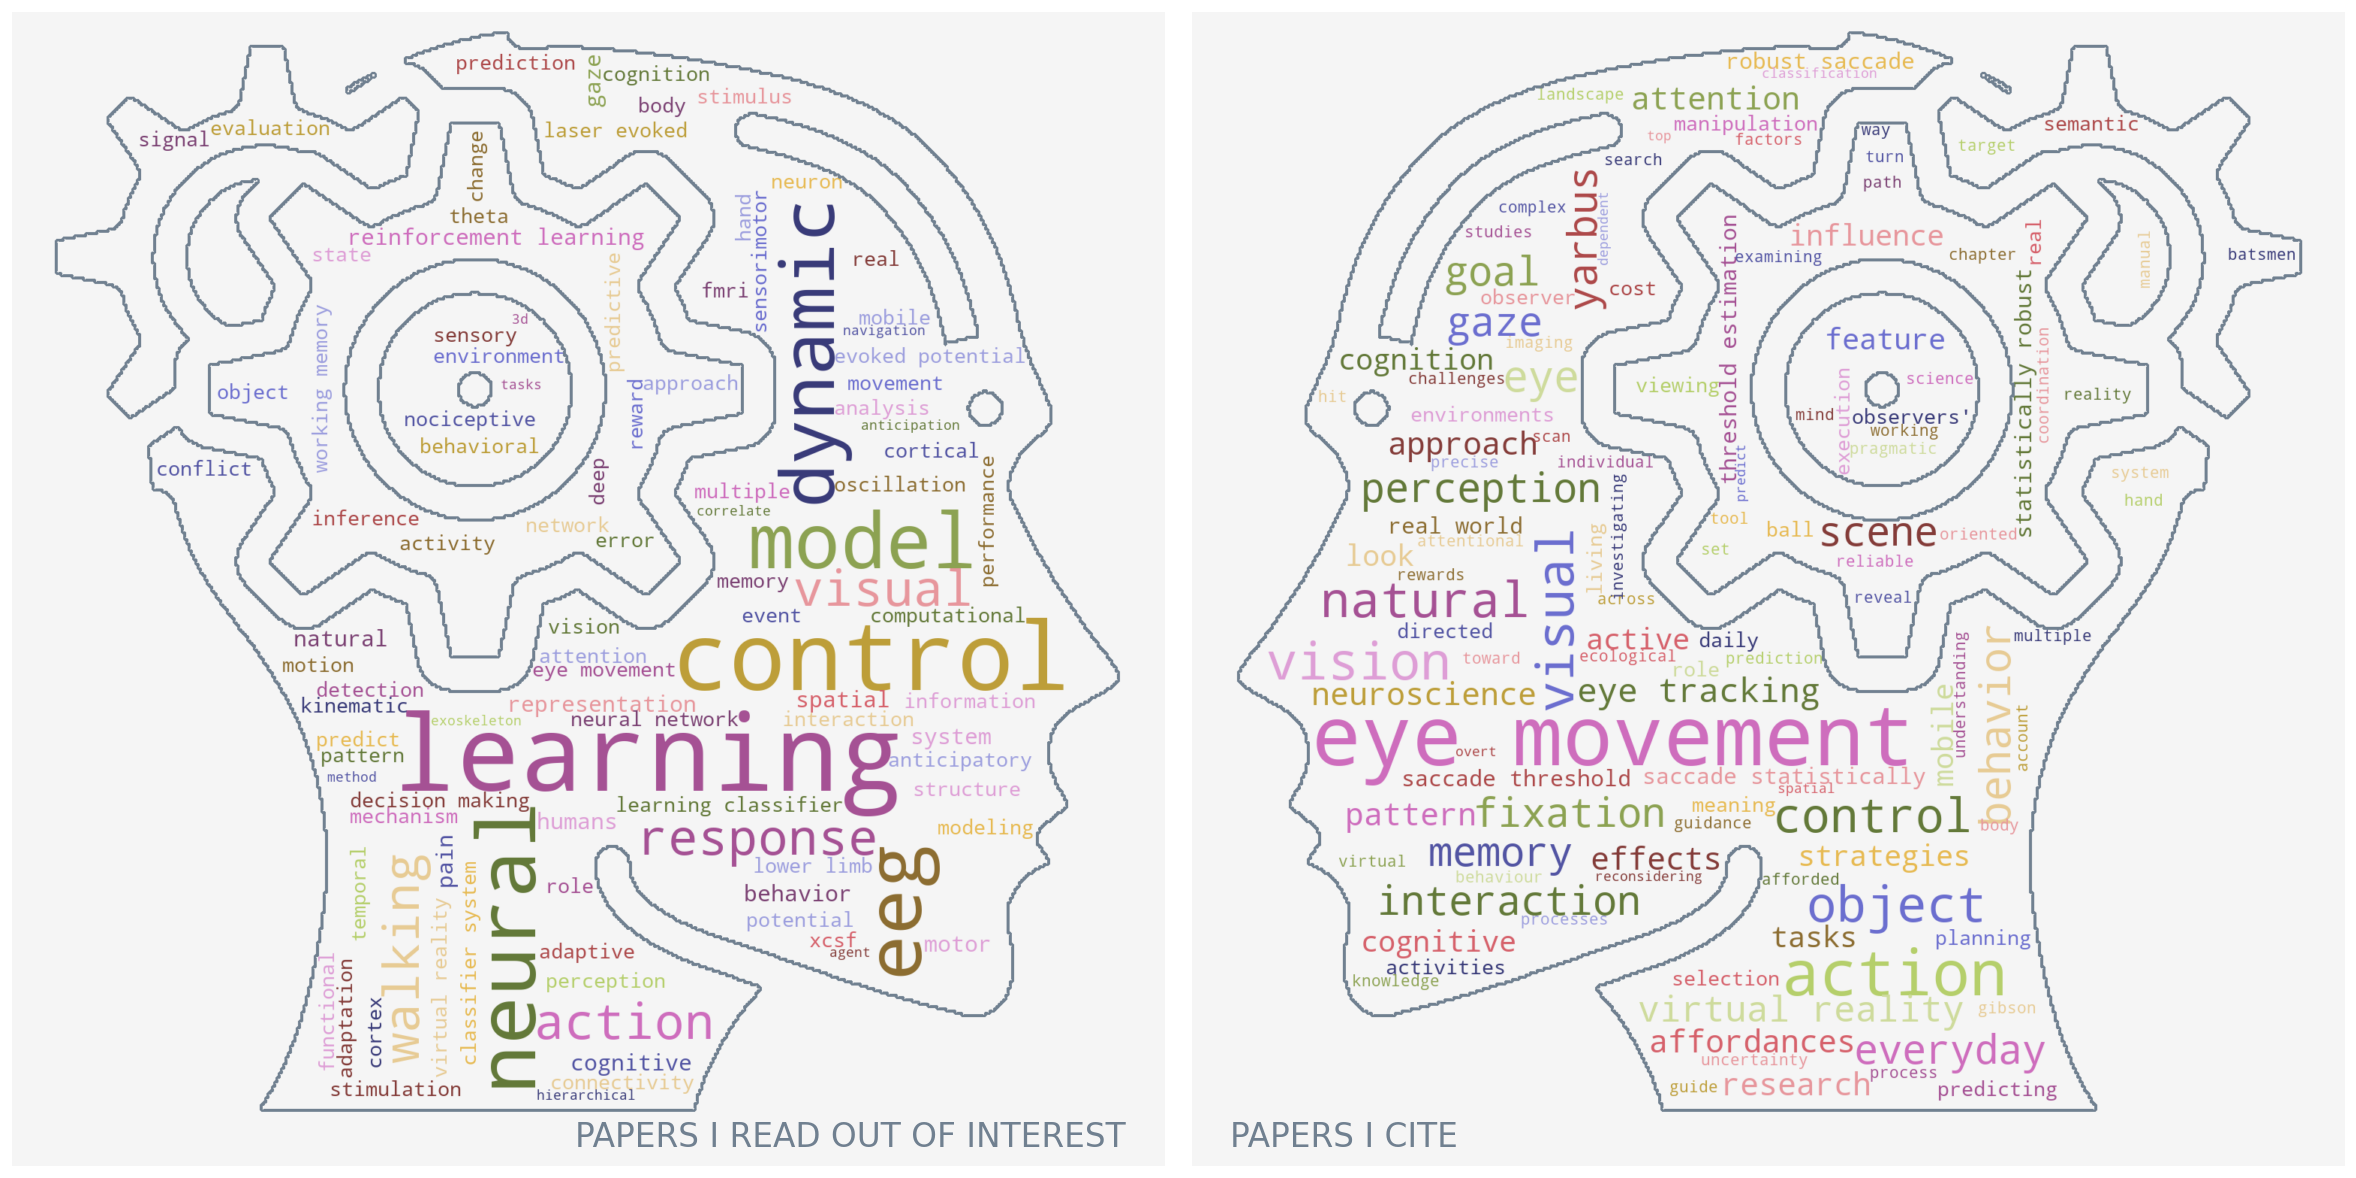

In [9]:
%matplotlib notebook

def init():    
    im1.set_data(wc1)
    return [im1],

def animate(i): 
    text_titles = ' '.join([t for t in pubs.query('year > 2020 - @i').title.values])
    wc1.generate(text_titles.lower())
    im1.set_data(wc1,)
    return [im1]

fig, ax = plt.subplots(1, 2, figsize=(30,15))
plt.subplots_adjust(wspace=0.01, left=0.01 )

im1 = ax[0].imshow(wc1, interpolation='bilinear', aspect='auto')
ax[0].axis("off")
ax[0].text(750, 1510, 'PAPERS I READ OUT OF INTEREST', fontsize=30, color='slategrey')

im2 = ax[1].imshow(wc2, interpolation='bilinear', aspect='auto')
ax[1].axis("off")
ax[1].text(50, 1510, 'PAPERS I CITE', fontsize=30, color='slategrey')
plt.tight_layout()


anim = animation.FuncAnimation(fig, animate, frames=25, interval=300, blit=True, init_func=init)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=0.8, metadata=dict(artist='Ashima Keshava'), bitrate=1800, )

anim.save('animated_art.gif', writer=writer) #, savefig_kwargs={'bbox_layout':'tight'})

